# <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift Condensed', sans-serif; font-size: 2.5em;">Connecting to MySQL Workbench
</h1>


In [1747]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import warnings # warning messages management
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
colors = ['#FF7F7F', '#FFF9C4', '#A5D6A7', '#81D4FA', '#F1F1F1']

# 📊 Statistical libraries
from scipy.stats import chi2_contingency # 🧮 Chi-squared test for independence
from scipy.stats.contingency import association # 📈 Measures association strength between categorical variables
import scipy.stats as st # ⚙️ General statistical functions
import statsmodels.api as sm # 📐 Advanced statistical models and testing
import statsmodels.formula.api as smf # 📝 Formula-based interface for statistical models

# Set the color palette for all plots by default
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

# 🌐 New Libraries
from getpass import getpass # get password without showing it
import pymysql # MySQL connection
import requests # HTTP requests
import time # time operations

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

def create_connection(): # create a connection to a MySQL database
    """
    Create a connection to a MySQL database.
    Prompts the user for the database password and database name.
    
    Returns:
        cnx: pymysql.connections.Connection object
            The connection object to the MySQL database.
    """
    password = getpass("Please, kindly insert your password: ")
    database = input("Please, kindly insert your database name: ")
    cnx = pymysql.connect(user='root', password=password,
                          host='localhost', database=database)
    if cnx.open:
        print("Connection open")
    else:
        print("Connection is not successfully open")
    return cnx

In [1748]:
# We enter the password and the database 
connection = create_connection()

Connection open


## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Testing the connection
</h1>


In [1749]:
query = "SELECT * FROM user_profile upr JOIN user_pay up USING (userID) JOIN user_cui uc USING (userID);"
df_user = pd.read_sql(query, connection)
df_user.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,Upayment,Rcuisine
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,cash,American
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,cash,Mexican
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69,cash,Mexican
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,bank_debit_cards,Bakery
4,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,cash,Bakery


# <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift Condensed', sans-serif; font-size: 2.5em;">Cleaning columns
</h1>


In [1750]:
# df_user = df_user.applymap(lambda x: str(x).replace('_', ' ').title())
# Si corremos esta celda, afectamos a la distribución de las columnas continuas.

In [1751]:
df_user.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,Upayment,Rcuisine
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,cash,American
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,cash,Mexican
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69,cash,Mexican
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,bank_debit_cards,Bakery
4,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,cash,Bakery


In [1752]:
df_user.columns.to_list()

['userID',
 'latitude',
 'longitude',
 'smoker',
 'drink_level',
 'dress_preference',
 'ambience',
 'transport',
 'marital_status',
 'hijos',
 'birth_year',
 'interest',
 'personality',
 'religion',
 'activity',
 'color',
 'weight',
 'budget',
 'height',
 'Upayment',
 'Rcuisine']

In [1753]:
columns_to_modify = ["Upayment", "color", "personality", "interest"]

for column in columns_to_modify:
    df_user[column] = df_user[column].str.replace("_", " ").str.replace("-"," ").str.capitalize()

df_user[columns_to_modify].head()


,Upayment,color,personality,interest
0,Cash,Black,Thrifty protector,Variety
1,Cash,Red,Hunter ostentatious,Technology
2,Cash,Blue,Hard worker,None
3,Bank debit cards,Green,Hard worker,Variety
4,Cash,Green,Hard worker,Variety


# <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift Condensed', sans-serif; font-size: 2.5em;">Univariate Categorical Analysis
</h1>


We will drop duplicates based on userID to avoid overrepresentation of users with multiple preferred payment methods or different preferred types of cuisine.

In [ ]:
df_user.drop_duplicates(subset="userID", inplace=True)

One of the most interesting tables is the user_profile one for exploratory analysis. That is the one we'll begin with:

In [1755]:
query = "SELECT * FROM user_profile u JOIN rating r USING (userID) JOIN location l USING (placeID);"
df_usloc = pd.read_sql(query, connection)
df_usloc.head()
## df_usloc.to_csv("../data/df_usloc.csv",index=False)

,placeID,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,rating,food_rating,service_rating,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,zip,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,135051,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,1,1,2,22.151189,-100.977058,0101000020957F0000D6537C4C224858C1DED7F6EB58A3...,Restaurante Versalles,Francisco I. Madero 145 Centro,San Luis Potosi,SLP,Mexico,?,78000,No_Alcohol_Served,section,informal,no_accessibility,low,?,familiar,f,closed,none
1,135025,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,2,2,2,22.149550,-100.977970,0101000020957F0000C7080D105C4858C108B4006AB4A3...,El Rincon de San Francisco,1a. de Lozada 1,San Luis Potosi,SLP,Mexico,?,?,No_Alcohol_Served,none,informal,no_accessibility,medium,?,familiar,f,closed,none
2,135033,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,1,1,1,22.141610,-100.973142,0101000020957F00000F624C60B54958C11757339BCCA2...,Restaurant El Muladar de Calzada,De Guadalupe 460 San Miguelito,San Luis Potosi,SLP,Mexico,?,78399,No_Alcohol_Served,section,informal,no_accessibility,medium,?,familiar,f,closed,none
3,135045,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,1,1,1,22.151189,-100.981790,0101000020957F00000B6735CA004858C108FD525CB2A4...,Restaurante la Gran Via,Venustiano Carranza 560 Centro,San Luis Potosi,SLP,Mexico,?,78000,Wine-Beer,none,casual,no_accessibility,high,lagranvia.com.mx,familiar,f,closed,none
4,135039,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,1,1,1,22.145893,-100.974870,0101000020957F000040D5CE4E014958C177DC62AE09A3...,Restaurant de Mariscos de Picon,Miguel Barragan 46 Centro,San Luis Potosi,SLP,Mexico,?,79300,No_Alcohol_Served,section,informal,no_accessibility,low,?,familiar,f,closed,none


In [1756]:
# List of categorical columns
categorical_columns = [
    'smoker', 
    'drink_level',
    'dress_preference',
    'ambience',
    'transport',
    'marital_status',
    'hijos', 
    'interest',
    'personality',
    'religion',
    'activity',
    'color', 
    'budget'
]

# Dictionary to store value_counts
value_counts_dict = {}

# Loop through each categorical column to apply value_counts() and sort it
for column in categorical_columns:
    value_counts_dict[column] = df_user[column].value_counts().sort_values(ascending=False)

# Print the value_counts dictionary
for column, counts in value_counts_dict.items():
    print(f"Value counts for {column}:")
    print(counts)
    print("\n")

Value counts for smoker:
smoker
false    374
true      37
Name: count, dtype: int64


Value counts for drink_level:
drink_level
casual drinker    206
abstemious        137
social drinker     68
Name: count, dtype: int64


Value counts for dress_preference:
dress_preference
informal         229
no preference     92
formal            76
elegant           11
?                  3
Name: count, dtype: int64


Value counts for ambience:
ambience
family      233
friends      93
solitary     82
?             3
Name: count, dtype: int64


Value counts for transport:
transport
public       197
on foot      137
car owner     72
?              5
Name: count, dtype: int64


Value counts for marital_status:
marital_status
single     386
married     21
widow        3
?            1
Name: count, dtype: int64


Value counts for hijos:
hijos
independent    266
kids           130
?                9
dependent        6
Name: count, dtype: int64


Value counts for interest:
interest
Variety         192
Techn

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Religion
</h1>


In [1757]:
df_user.religion = df_user.religion.apply(lambda x: str(x).replace('_', ' ').title())

In [1758]:
freq_religion = df_user.religion.value_counts().sort_values(ascending=False)
freq_religion


religion
Catholic     347
None          50
Christian      8
Mormon         4
Jewish         2
Name: count, dtype: int64

In [1759]:
df_user.religion = df_user.religion.apply(lambda x: "Atheist" if x == "None" else x)

In [1760]:
## We deactivate this cell when we want to run the code  
## to create `df_user_filter` and `df_user_filter_collapsed`,  
## to avoid reducing the variety of religions in the filter.  
## However, we deactivate it for `df_user` as it is intended  
## for visualization, and to make it more user-friendly,  
## we group the less represented categories under "Others".

""" percentages = df_user['religion'].value_counts(normalize=True)
categories_to_replace = percentages[percentages < 0.21].index
df_user['religion'] = df_user['religion'].replace(categories_to_replace, 'Others')
freq_religion_replaced = df_user.religion.value_counts().sort_values(ascending=False)
freq_religion_replaced """


" percentages = df_user['religion'].value_counts(normalize=True)\ncategories_to_replace = percentages[percentages < 0.21].index\ndf_user['religion'] = df_user['religion'].replace(categories_to_replace, 'Others')\nfreq_religion_replaced = df_user.religion.value_counts().sort_values(ascending=False)\nfreq_religion_replaced "

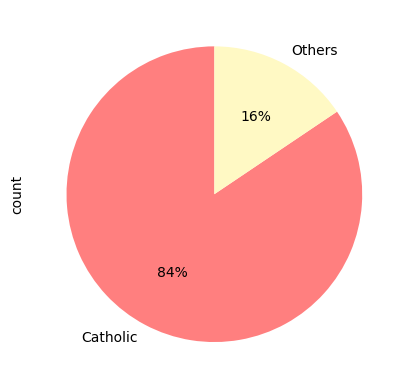

In [1761]:
freq_religion_replaced.plot.pie(autopct='%1.0f%%' ,startangle=90)
plt.show()

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Smoker
</h1>


In [1762]:
df_user.smoker = df_user.smoker.apply(lambda x: str(x).replace('_', ' ').title())

In [1763]:
freq_smoker=df_user.smoker.value_counts()
freq_smoker

smoker
False    374
True      37
Name: count, dtype: int64

In [1764]:
df_user.smoker = df_user.smoker.apply(lambda x: "False" if x == "?" else x)

In [1765]:
freq_smoker=df_user.smoker.value_counts()
freq_smoker

smoker
False    374
True      37
Name: count, dtype: int64

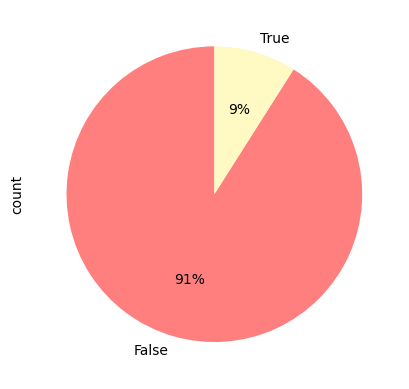

In [1766]:
freq_smoker.plot.pie(autopct='%1.0f%%' ,startangle=90)
plt.show()

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Drink level</h1>


In [1767]:
df_user.drink_level = df_user.drink_level.apply(lambda x: str(x).replace('_', ' ').capitalize())

In [1768]:
freq_drink=df_user.drink_level.value_counts()
freq_drink

drink_level
Casual drinker    206
Abstemious        137
Social drinker     68
Name: count, dtype: int64

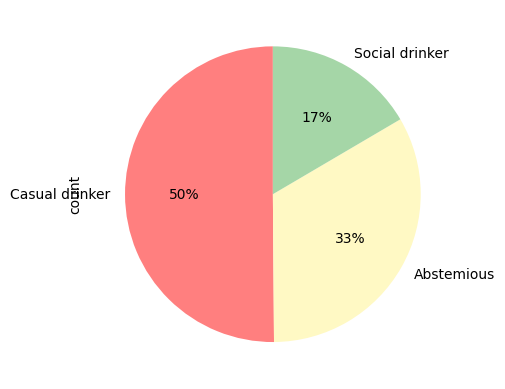

In [1769]:
freq_drink.plot.pie(autopct='%1.0f%%' ,startangle=90)
plt.show()

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Dress preference</h1>


In [1770]:
df_user.dress_preference = df_user.dress_preference.apply(lambda x: str(x).replace('_', ' ').capitalize())

In [1771]:
freq_dress=df_user.dress_preference.value_counts()
freq_dress

dress_preference
Informal         229
No preference     92
Formal            76
Elegant           11
?                  3
Name: count, dtype: int64

In [1772]:
df_user.dress_preference = df_user.dress_preference.replace("?", None).ffill()
freq_dress=df_user.dress_preference.value_counts()

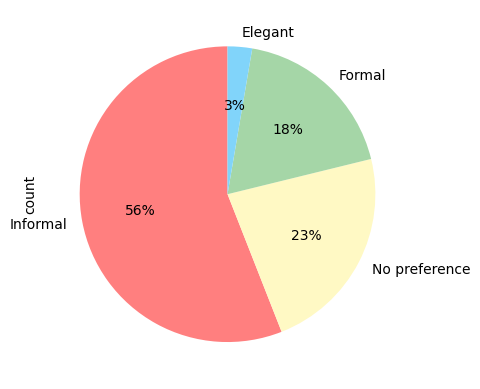

In [1773]:
freq_dress.plot.pie(autopct='%1.0f%%' ,startangle=90)
plt.show()

<h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Ambience</h1>


In [1774]:
df_user.ambience = df_user.ambience.apply(lambda x: str(x).replace('_', ' ').title())

In [1775]:
df_user.ambience = df_user.ambience.replace("?", None).ffill()

In [1776]:
freq_ambience=df_user.ambience.value_counts()
freq_ambience

ambience
Family      235
Friends      94
Solitary     82
Name: count, dtype: int64

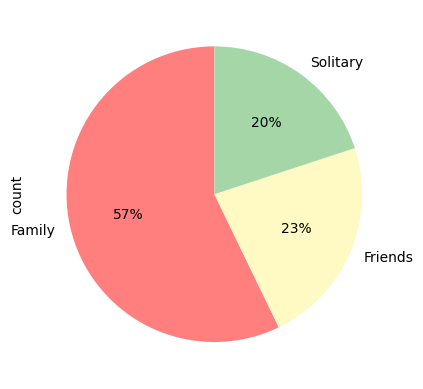

In [1777]:
freq_ambience.plot.pie(autopct='%1.0f%%' ,startangle=90)
plt.show()

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Transport</h1>


In [1778]:
df_user.transport = df_user.transport.apply(lambda x: str(x).replace('_', ' ').capitalize())

In [1779]:
df_user.transport = df_user.transport.replace("?", None).ffill()

In [1780]:
freq_transport=df_user.transport.value_counts()
freq_transport

transport
Public       200
On foot      139
Car owner     72
Name: count, dtype: int64

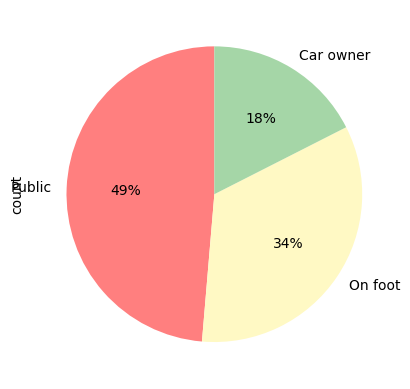

In [1781]:
freq_transport.plot.pie(autopct='%1.0f%%' ,startangle=90)
plt.show()

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Marital status</h1>


In [1782]:
df_user.marital_status = df_user.marital_status.apply(lambda x: str(x).replace('_', ' ').capitalize())

In [1783]:
df_user.marital_status = df_user.marital_status.replace("?", None).ffill()

In [1784]:
freq_marital=df_user.marital_status.value_counts()
freq_marital

marital_status
Single     387
Married     21
Widow        3
Name: count, dtype: int64

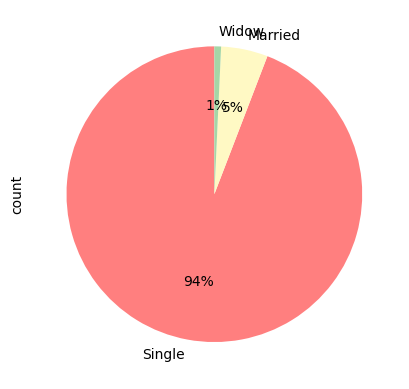

In [1785]:
freq_marital.plot.pie(autopct='%1.0f%%' ,startangle=90)
plt.show()

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Descendants</h1>


In [1786]:
df_user.hijos = df_user.hijos.apply(lambda x: str(x).replace('_', ' ').capitalize())

In [1787]:
df_user.hijos = df_user.hijos.replace("?", None).ffill()

In [1788]:
freq_descendants=df_user.hijos.value_counts()
freq_descendants

hijos
Independent    274
Kids           131
Dependent        6
Name: count, dtype: int64

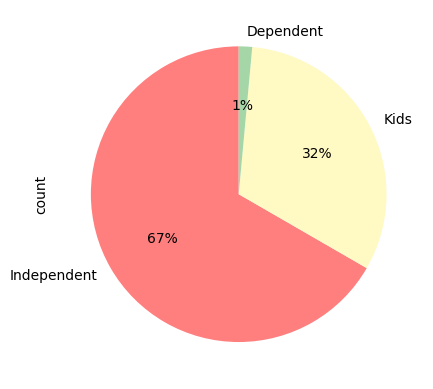

In [1789]:
freq_descendants.plot.pie(autopct='%1.0f%%' ,startangle=90)
plt.show()

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Activity</h1>


In [1790]:
df_user.activity = df_user.activity.apply(lambda x: str(x).replace('_', ' ').capitalize())

In [1791]:
df_user.activity = df_user.activity.replace("?", None).ffill()

In [1792]:
freq_activity=df_user.activity.value_counts()
freq_activity

activity
Student          353
Professional      53
Unemployed         3
Working-class      2
Name: count, dtype: int64

In [1793]:

percentages_activity = df_user['activity'].value_counts(normalize=True)
categories_to_replace = percentages_activity[percentages_activity < 0.05].index
df_user['activity'] = df_user['activity'].replace(categories_to_replace, 'Others')
freq_activity_replaced = df_user.activity.value_counts().sort_values(ascending=False)
freq_activity_replaced


activity
Student         353
Professional     53
Others            5
Name: count, dtype: int64

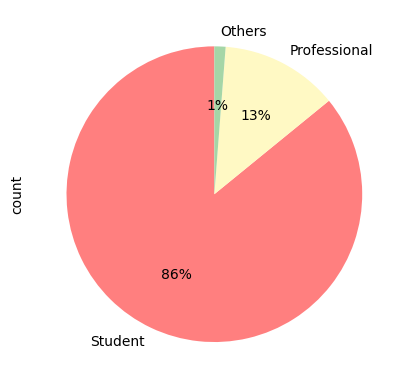

In [1794]:
freq_activity_replaced.plot.pie(autopct='%1.0f%%' ,startangle=90)
plt.show()

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Budget</h1>


In [1795]:
df_user.budget = df_user.budget.apply(lambda x: str(x).replace('_', ' ').capitalize())

In [1796]:
df_user.budget = df_user.budget.replace("?", None).ffill()

In [1797]:
freq_budget=df_user.budget.value_counts()
freq_budget

budget
Medium    236
Low       165
High       10
Name: count, dtype: int64

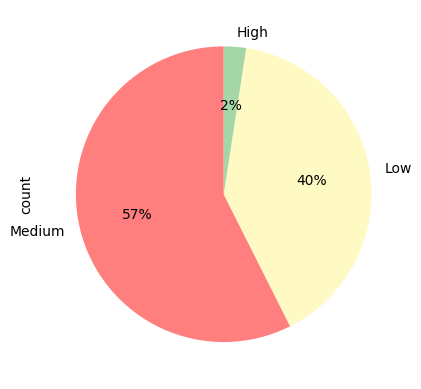

In [1798]:
freq_budget.plot.pie(autopct='%1.0f%%' ,startangle=90)
plt.show()

# <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift Condensed', sans-serif; font-size: 2.5em;">Univariate Continuous Analysis
</h1>


From df_user, we will now focus on the continuous columns, examining their distribution.

In [1799]:
continuous_columns = ['birth_year','weight','height']  

In [1800]:
df_user_cont=df_user[continuous_columns]
df_user_cont

,birth_year,weight,height
0,1989,69,1.77
1,1990,40,1.87
2,1989,60,1.69
3,1940,44,1.53
4,1940,44,1.53
...,...,...,...
406,1988,66,1.54
407,1988,66,1.54
408,1990,50,1.60
409,1989,72,1.78


In [1801]:
df_user_cont.describe().T

,count,mean,std,min,25%,50%,75%,max
birth_year,411.0,1984.335766,12.575592,1930.0,1984.00,1988.00,1989.500,1994.0
weight,411.0,66.588808,13.979908,40.0,60.00,66.00,76.000,120.0
height,411.0,1.662676,0.117320,1.2,1.54,1.67,1.765,2.0


## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Birth year</h1>


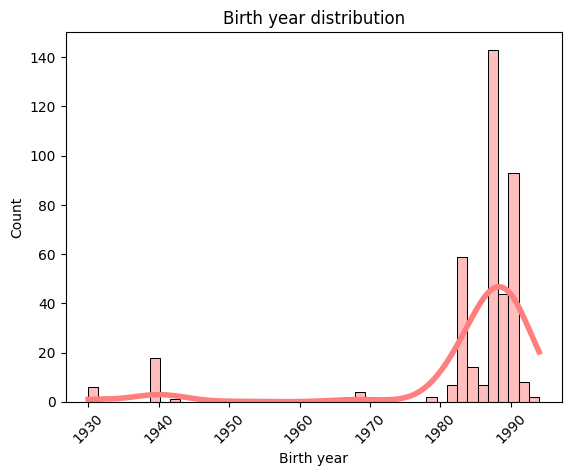

In [1802]:
sns.histplot(data=df_user, x="birth_year",kde=True,line_kws={'linewidth': 4}) 
plt.title("Birth year distribution")
plt.xlabel("Birth year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

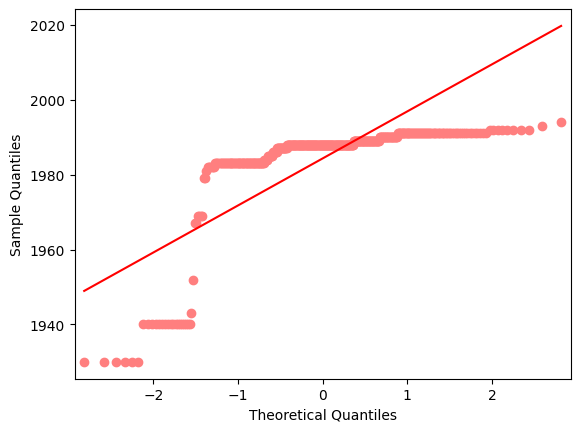

In [1803]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df_user['birth_year'], line='s');
plt.show()

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Weight</h1>


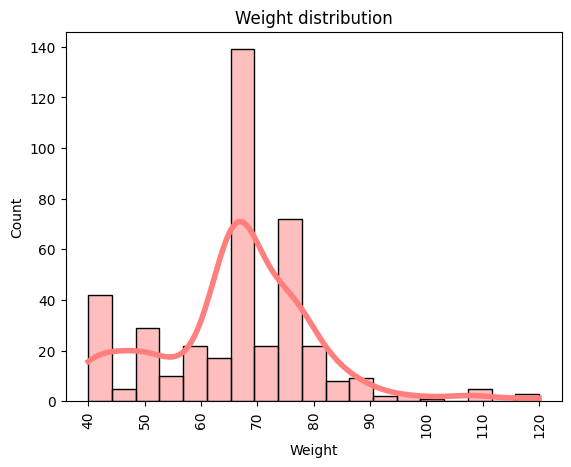

In [1804]:
sns.histplot(data=df_user, x="weight",kde=True,line_kws={'linewidth': 4}) 
plt.title("Weight distribution")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

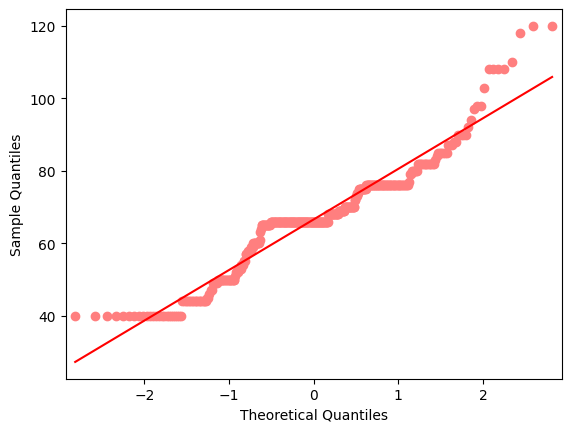

In [1805]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df_user['weight'], line='s');
plt.show()

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Height</h1>


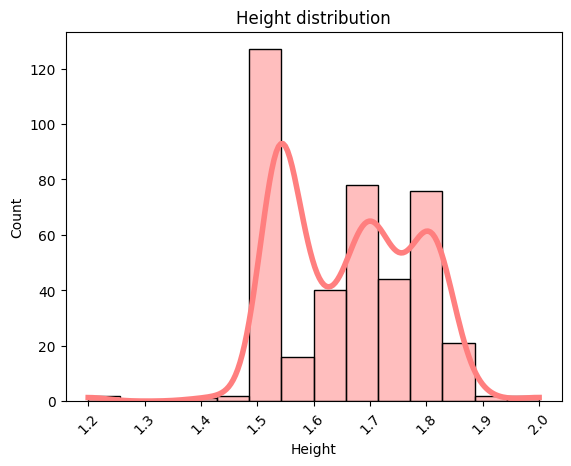

In [1806]:
sns.histplot(data=df_user, x="height",kde=True,line_kws={'linewidth': 4}) 
plt.title("Height distribution")
plt.xlabel("Height")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

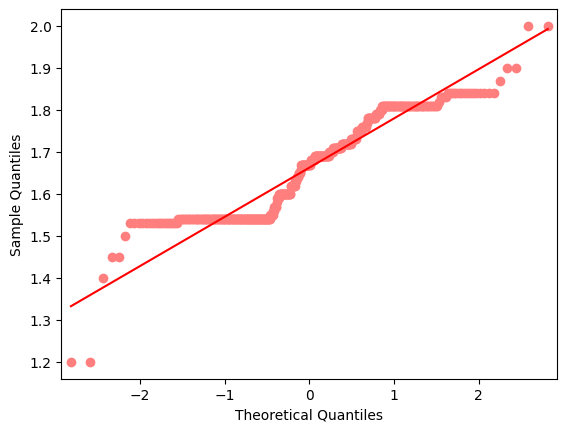

In [1807]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df_user['height'], line='s');
plt.show()

According to the QQ plot, we can observe that the `height` column has a fairly normalized distribution.

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Rating</h1>


Finally, we will analyze the `rating` column, which is numeric but could be considered categorical due to its few unique values (5). We will test this with a barplot, although we will also check how it looks with a histogram.

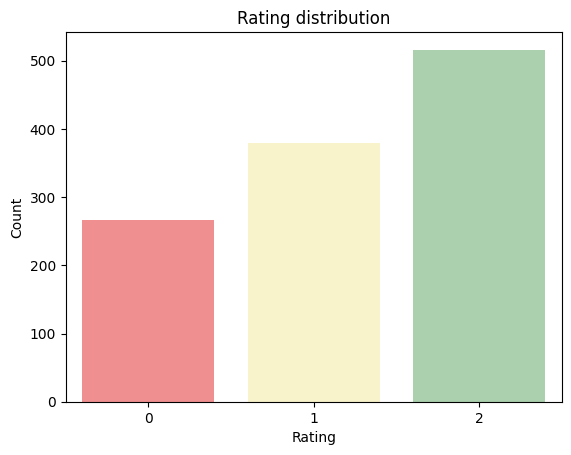

In [1808]:
sns.countplot(data=df_rating, x="food_rating",palette = ['#FF7F7F', '#FFF9C4', '#A5D6A7', '#81D4FA', '#F1F1F1']) 
plt.title("Rating distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

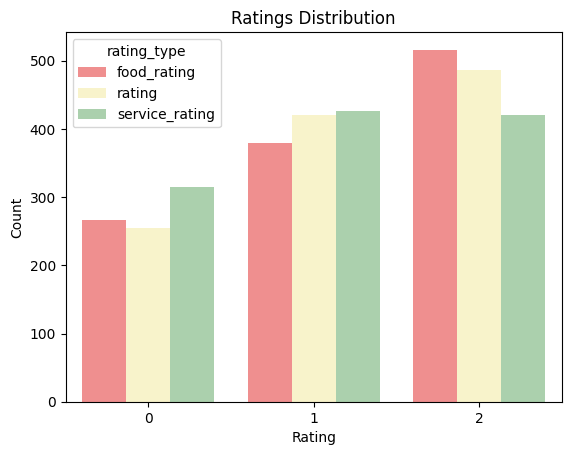

In [1809]:
df_melted = df_rating.melt(
    value_vars=["food_rating", "rating", "service_rating"], 
    var_name="rating_type", 
    value_name="rating_value"  # Cambiar el nombre aquí
)

# Crear el gráfico
sns.countplot(data=df_melted, x="rating_value", hue="rating_type")
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift Condensed', sans-serif; font-size: 2.5em;">Bivariate Analysis
</h1>


In [1810]:
df_user.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,Upayment,Rcuisine
0,U1001,22.139997,-100.978803,False,Abstemious,Informal,Family,On foot,Single,Independent,1989,Variety,Thrifty protector,Atheist,Student,Black,69,Medium,1.77,Cash,American
1,U1002,22.150087,-100.983325,False,Abstemious,Informal,Family,Public,Single,Independent,1990,Technology,Hunter ostentatious,Catholic,Student,Red,40,Low,1.87,Cash,Mexican
2,U1003,22.119847,-100.946527,False,Social drinker,Formal,Family,Public,Single,Independent,1989,None,Hard worker,Catholic,Student,Blue,60,Low,1.69,Cash,Mexican
3,U1004,18.867000,-99.183000,False,Abstemious,Informal,Family,Public,Single,Independent,1940,Variety,Hard worker,Atheist,Professional,Green,44,Medium,1.53,Bank debit cards,Bakery
4,U1004,18.867000,-99.183000,False,Abstemious,Informal,Family,Public,Single,Independent,1940,Variety,Hard worker,Atheist,Professional,Green,44,Medium,1.53,Cash,Bakery


## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Interest vs. Budget</h1>


In [1811]:
crosstab_result=pd.crosstab(index=df_user.interest,columns=df_user.budget)
crosstab_result

budget,High,Low,Medium
interest,,,
Eco friendly,0,20,29
None,1,5,27
Retro,0,2,6
Technology,7,17,105
Variety,2,121,69


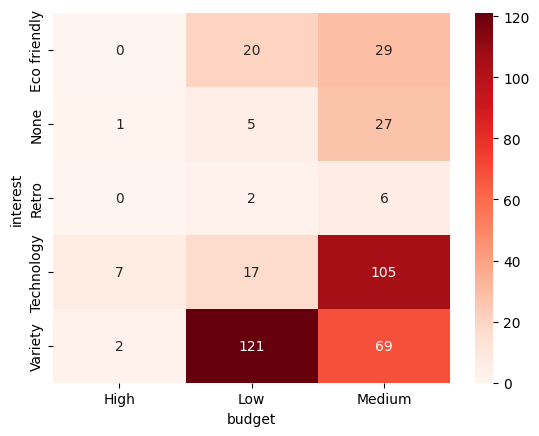

In [1812]:
sns.heatmap(crosstab_result, annot=True, cmap="Reds", fmt="d")
plt.show()

The heatmap doesn't retrieves anything valuable, since medium budget is quite positively unbalanced, so everything seems correlated with that column. 

In [1813]:
# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result)

In [1814]:
chi2_pvalue 

np.float64(7.395210843830613e-17)

We fail to reject the null hypothesis because the p-value is greater than 0.05, indicating, then, that the two features (interest and budget) are independent.

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Smoker vs. Drink Level</h1>


In [1815]:
crosstab_result_2=pd.crosstab(index=df_user.smoker,columns=df_user.drink_level)
crosstab_result_2

drink_level,Abstemious,Casual drinker,Social drinker
smoker,,,
False,136,190,48
True,1,16,20


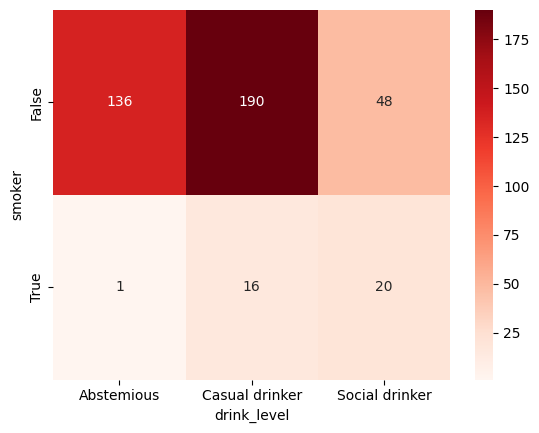

In [1816]:
sns.heatmap(crosstab_result_2, annot=True, cmap="Reds", fmt="d")
plt.show()

In [1817]:
# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result_2)

In [1818]:
chi2_pvalue 

np.float64(8.382012154386263e-11)

In [1819]:
# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result_2, method='cramer')

0.33601607555808

Although the 'smoker' variable is also imbalanced, we observe a clear pattern indicating that there are almost no people who both smoke and are also abstainers. This is why the chi-square test detects some dependency between the two columns though, regarding the Cramer test, we can see the relation is not strong.  

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Ambience vs. Marital Status</h1>


In [1820]:
crosstab_result_3=pd.crosstab(index=df_user.ambience,columns=df_user.marital_status)
crosstab_result_3

marital_status,Married,Single,Widow
ambience,,,
Family,17,218,0
Friends,2,90,2
Solitary,2,79,1


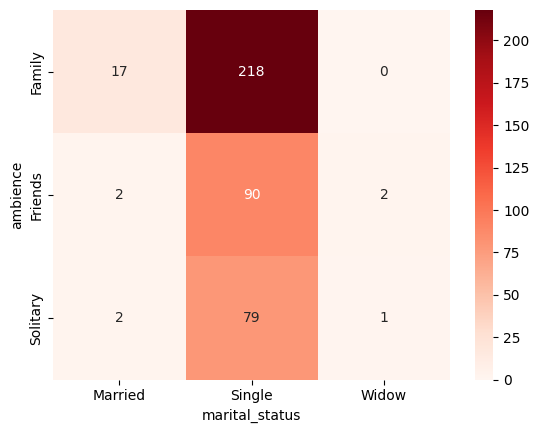

In [1821]:
sns.heatmap(crosstab_result_3, annot=True, cmap="Reds", fmt="d")
plt.show()

In [1822]:
# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result_3)

In [1823]:
chi2_pvalue 

np.float64(0.05033086965833308)

We observe that there are no singnificative relation between the preferred ambience and marital status. The heatmap just shows a concentration in single column due to the unbalanced data. 

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Height vs. Weight</h1>


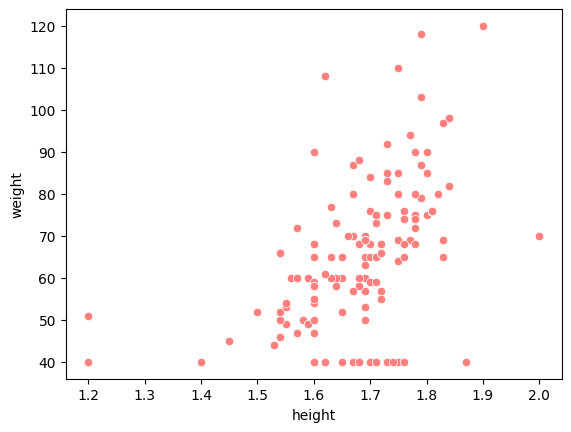

In [1824]:
# Plotting a scatter plot to visualize the relationship between 'GrLivArea' and 'SalePrice'
sns.scatterplot(data=df_user, x='height', y='weight',palette = ['#FF7F7F', '#FFF9C4', '#A5D6A7', '#81D4FA', '#F1F1F1'])
plt.show()

In [1825]:
# Calculating the Pearson correlation coefficient between 'SalePrice' and 'GrLivArea' columns
df_user.weight.corr(df_user.height) # PEARSON

np.float64(0.48614985698960633)

In [1826]:
# Calculating the Spearman rank correlation between 'SalePrice' and 'GrLivArea'
df_user.weight.corr(df_user.height, method='spearman')

np.float64(0.6046205094630359)

Both the Pearson and Spearman tests show some correlation between the two columns (positive, as greater height is expected to correspond to greater weight). The relationship is slightly stronger when non-linearity is assumed (Spearman > Pearson).

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Height vs. Marital Status</h1>


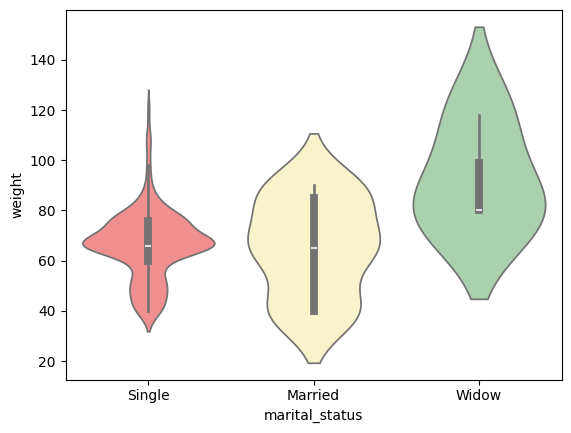

In [1827]:
# Plotting a violin plot to visualize the distribution of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.violinplot(data=df_user, x="marital_status", y="weight",palette = ['#FF7F7F', '#FFF9C4', '#A5D6A7', '#81D4FA', '#F1F1F1'])
plt.show()

In [1828]:
column_small = df_user[(df_user["marital_status"] == "Single")]["weight"]
column_medium = df_user[(df_user["marital_status"] == "Married")]["weight"]
column_large = df_user[(df_user["marital_status"] == "Widow")]["weight"]


In [1829]:
print(column_small.mean())
print(column_medium.mean())
print(column_large.mean())

66.44702842377261
65.47619047619048
92.66666666666667


In [1830]:
# Perform One-Way ANOVA
f_stat, p_value = st.f_oneway(column_small,column_medium, column_large) ## python considera anova como un subtipo de fisher, por eso es f_
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print()

# Significance level
alpha = 0.05

# Decision-Making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: Marital status has no significant impact on weight.")
else:
    print("Reject the Null Hypothesis: There is a significant difference in weight based on marital status.")

F-Statistic: 5.42
P-Value: 0.0048

Reject the Null Hypothesis: There is a significant difference in weight based on marital status.


# <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift Condensed', sans-serif; font-size: 2.5em;">Exporting the datasets
</h1>


In [1831]:
## df_user.to_csv("../data/df_user.csv",index=False)

## <h1 style="text-align: left; color: #FFB347; font-family: 'Bahnschrift', sans-serif; font-size: 1.5em;">Renaming columns for Dataframe filter oriented</h1>


In [1832]:
rename_columns = {
    "userID": "User ID",
    "latitude": "Latitude",
    "longitude": "Longitude",
    "smoker": "Smoking Habit",
    "drink_level": "Drinking Habit",
    "dress_preference": "Dress Preference",
    "ambience": "Preferred Ambience",
    "transport": "Transport Mode",
    "marital_status": "Marital Status",
    "hijos": "People Under Charge",
    "birth_year": "Birth Year",
    "interest": "Interest",
    "personality": "Personality",
    "religion": "Religion",
    "activity": "Activity Level",
    "color": "Favorite Color",
    "weight": "Weight (kg)",
    "budget": "Budget",
    "height": "Height (cm)",
    "Upayment": "Preferred Payment Method",
    "Rcuisine": "User Preference"
}


df_user.rename(columns=rename_columns, inplace=True)


In [1833]:
## This cell will just be activated in case we have dropped
## the duplicates at the beginning of the notebook.
## df_user.to_csv("../data/df_user_filter_collapsed.csv",index=False)

In [ ]:
## This cell will just be activated in case we haven't
## dropped the duplicates 
## df_user.to_csv("../data/df_user_filter.csv",index=False)